<a href="https://colab.research.google.com/github/gkondayya/ACP2021/blob/main/rolling_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 7.4 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import pandas as pd
import datetime as dt
import yfinance as yf

In [4]:
stocks = ["RELIANCE.NS","IRCTC.NS", "HDFCBANK.NS","INFY.NS","AMBER.NS", "BAJFINANCE.NS"]
start = dt.datetime.today()-dt.timedelta(3650)
end = dt.datetime.today()

In [7]:
cl_price = pd.DataFrame()
for ticker in stocks:
  cl_price[ticker] = yf.download(ticker,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
cl_price.dropna(axis=0,how='any', inplace =True)
daily_change = cl_price.pct_change()
daily_change.rolling(window=10).mean()
daily_change.rolling(window=10).std()
daily_change.rolling(window=10).max()
daily_change.rolling(window=10).sum()



In [17]:
daily_change.ewm(com=10,min_periods=10).mean()

,RELIANCE.NS,IRCTC.NS,HDFCBANK.NS,INFY.NS,AMBER.NS,BAJFINANCE.NS
Date,,,,,,
2019-10-14,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-15,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-16,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-17,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-18,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-12-14,-0.002346,0.001544,-0.001647,0.001016,0.000124,-0.002176
2021-12-15,-0.002398,0.000994,-0.001646,-0.000007,0.002844,-0.004791
2021-12-16,-0.001004,0.001005,-0.001490,0.001954,0.005416,-0.001944


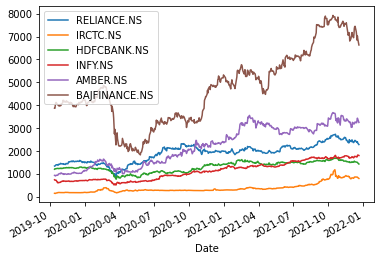

In [18]:
cl_price.plot() 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f74f6516550>,
      dtype=object)

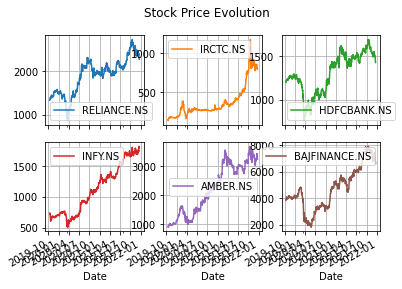

In [20]:
cl_price.plot(subplots=True, layout = (2,3), title = "Stock Price Evolution", grid =True) # Subplots of the stocks

<BarContainer object of 6 artists>

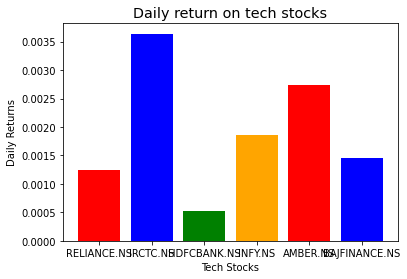

In [22]:
# Pyplot demo
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.style.available
plt.style.use('ggplot')
ax.set(title="Daily return on stocks", xlabel="Stocks", ylabel = "Daily Returns")
plt.bar(daily_change.columns,daily_change.mean(),color=["red","blue","green","orange"])

In [25]:
daily_change.mean()

RELIANCE.NS      0.001251
IRCTC.NS         0.003639
HDFCBANK.NS      0.000528
INFY.NS          0.001866
AMBER.NS         0.002739
BAJFINANCE.NS    0.001461
dtype: float64